In [125]:
import torch
from matplotlib import pyplot as plt
import numpy
from PIL import Image

In [120]:
%run FastTPC.ipynb

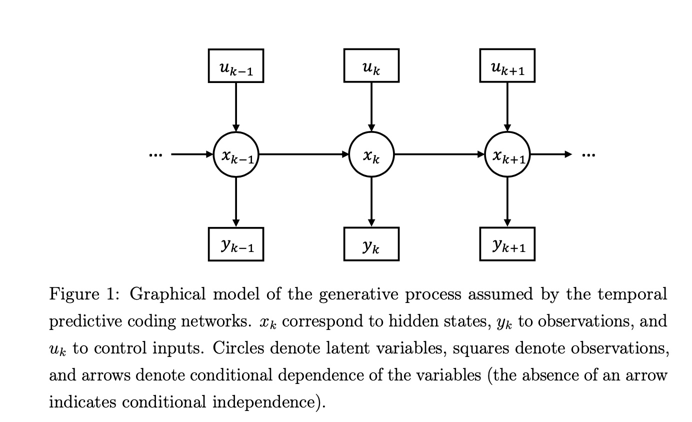

In [155]:
im = Image.open("ModelGraphic.jpg")
width, height = im.size
im.resize((int(width/2), int(height/2)))


In the following A is the matrix that goes from x(k-1) to x(k) and C is the matrix that goes from x(k) to y(k). 

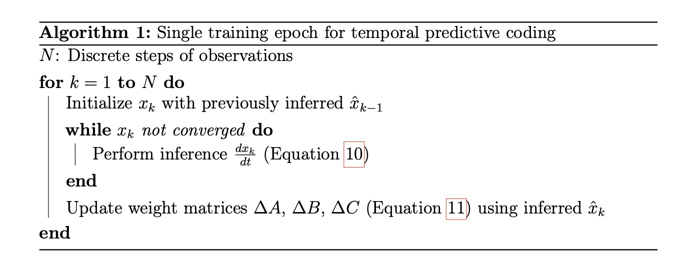

In [156]:
im = Image.open("Algorithm.jpg")
width, height = im.size
im.resize((int(width/2), int(height/2)))

 In this document we are only looking at the inference part, the weight matrices are treated as constants.

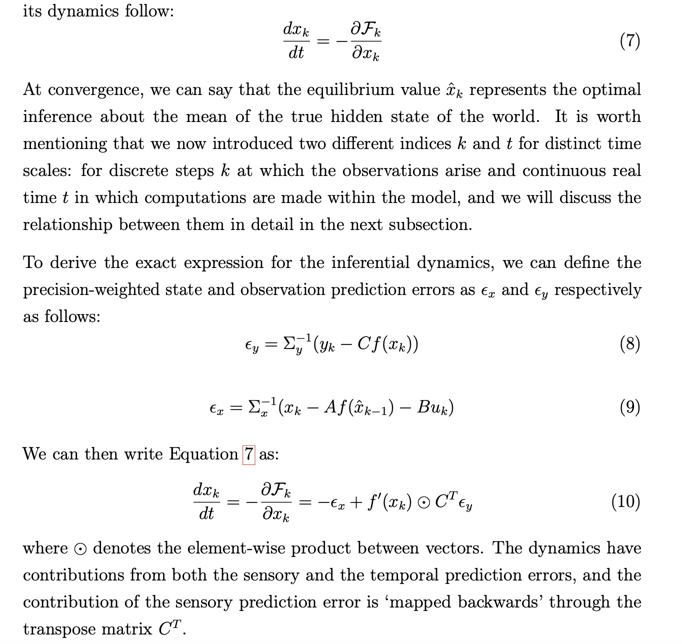

In [157]:
im = Image.open("Equations.jpg")
width, height = im.size
im.resize((int(width/2), int(height/2)))

Note that I have removed the control inputs from the model and that I'm not using precision-weighted prediction error, as the prediction errors should reduce either way.
This means that 

(8) becomes $$ e_{y} = y_{k} - C f(y_{k})$$

(9) becomes $$ e_{x} = x_{k} - A f(x_{k-1}) $$

In [158]:
model = FastTPC(151875,1000,151875) # This is only to access A, C and prev_x

In [159]:
model.init_hidden(1) # initialising prev_x

In [160]:
# This is to make notation simpler
x = model.x
prev_x = model.prev_x 
C = model.C
A = model.A
f = model.f 
y = flat 

In [161]:
# This is to keep track of changes to the variables 
xs = []
error_xs = []
error_ys = []
MSE = []
delta_xs = []


# This is the actual algrorithm
x = prev_x.clone() # 'Initialize xk with previously inferred xˆk−1' Algorithm 1 
for i in range(50): 
    err_y = (y - C @ f(x)) # (8)
    err_x = x - A @ f(prev_x) # (9)
    delta_x = -err_x + f.deriv(x).t() @ C.t() @ err_y
    x += 0.01* delta_x # (10)
    

    xs.append((x**2).mean().detach().numpy())
    error_xs.append((err_x**2).mean().detach().numpy())
    error_ys.append((err_y**2).mean().detach().numpy())
    MSE.append(((err_x**2).mean() + (err_y**2)).mean().detach().numpy())
    

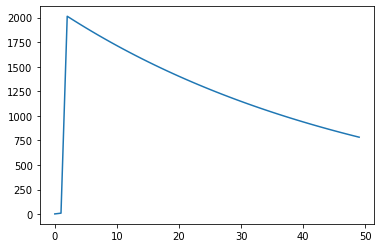

In [162]:
plt.plot(error_xs)

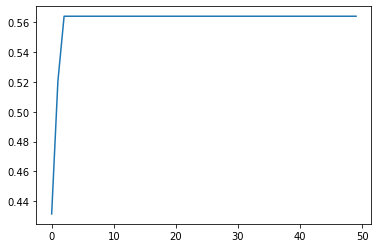

In [163]:
plt.plot(error_ys)

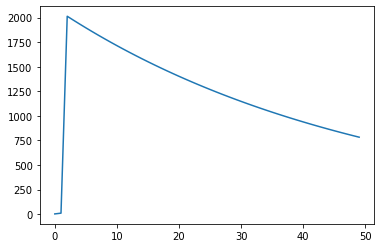

In [164]:
plt.plot(MSE)

Because inference does not find an x that reduces error_y, this means that C has to adapt to the new x^ at every time step. Ideally we would like A and C to be relatively constant so that we can predict the next input. 